In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
import seaborn as sns

import sys, os
sys.dont_write_bytecode = True

import warnings
warnings.filterwarnings('ignore')

PATH = 'out_exp'
os.makedirs(PATH, exist_ok=True)

data_path = 'data/20220608_experimental_data.xlsx'

In [2]:
plt.rcParams['font.size'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['font.family'] = 'Hiragino sans'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['axes.grid'] = False
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 2
plt.rcParams["legend.markerscale"] = 2
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.edgecolor"] = 'black'
plt.rcParams.update({'mathtext.default':  'regular' })

In [3]:
from matplotlib.patches import ArrowStyle

def arrow(start, end, i=1):
    
    point = {
        'start': start,
        'end': end
        }

    ax[i].annotate('', xy=point['end'], xytext=point['start'],
                arrowprops=dict(arrowstyle=ArrowStyle('|-|', widthA=0.3, widthB=0.3),
                                connectionstyle='arc3',
                                facecolor='k', edgecolor='k')
                    )

In [4]:
data = pd.ExcelFile(data_path)
sheet_names = data.sheet_names
print(sheet_names)

['Arrhenius_plot', 'XRD_Comparison', 'XRD_ref', 'XRD_Fresh_and_Spent', 'H2-TPR', 'CO2-TPD', 'IR_CO2', 'IR_plot_carbonates', 'IR_plot_ads_CO', 'IR_plot_gas_CO', 'IR_best', 'IR_best_py', 'IR_best_plot', 'Stability_A', 'Stability_B']


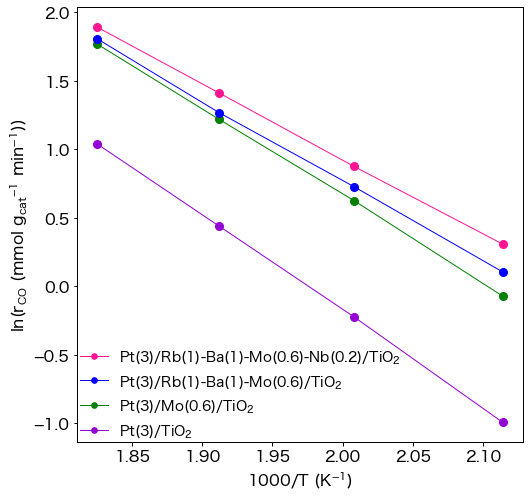

In [5]:
Arrhenius = pd.read_excel(data_path, sheet_name='Arrhenius_plot', skiprows=1)

fig, ax = plt.subplots(facecolor='white', figsize=(8, 8))
plt.xlabel('1000/T ($K^{-1}$)', fontsize=16)
plt.ylabel('ln($r_{CO}$ (mmol $g_{cat}$$^{-1}$ $min^{-1}$))', fontsize=16)
plt.tick_params(labelsize=16)
ax.plot(Arrhenius.iloc[:, 0], Arrhenius.iloc[:, 1], marker="o", markersize=8, color='darkviolet', linestyle='solid', linewidth=1, alpha=1, label='Pt(3)/$TiO_{2}$')
ax.plot(Arrhenius.iloc[:, 2], Arrhenius.iloc[:, 3], marker="o", markersize=8, color='green', linestyle='solid', linewidth=1, alpha=1, label='Pt(3)/Mo(0.6)/$TiO_{2}$')
ax.plot(Arrhenius.iloc[:, 4], Arrhenius.iloc[:, 5], marker="o", markersize=8, color='blue', linestyle='solid', linewidth=1, alpha=1, label='Pt(3)/Rb(1)-Ba(1)-Mo(0.6)/$TiO_{2}$')
ax.plot(Arrhenius.iloc[:, 6], Arrhenius.iloc[:, 7], marker="o", markersize=8, color='deeppink', linestyle='solid', linewidth=1, alpha=1, label='Pt(3)/Rb(1)-Ba(1)-Mo(0.6)-Nb(0.2)/$TiO_{2}$')

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(-0.02,0.247), loc='upper left', markerscale=0.7, frameon=False, fontsize=14)

plt.savefig(f'{PATH}/Arrhenius_plot.png', dpi=600, bbox_inches='tight')


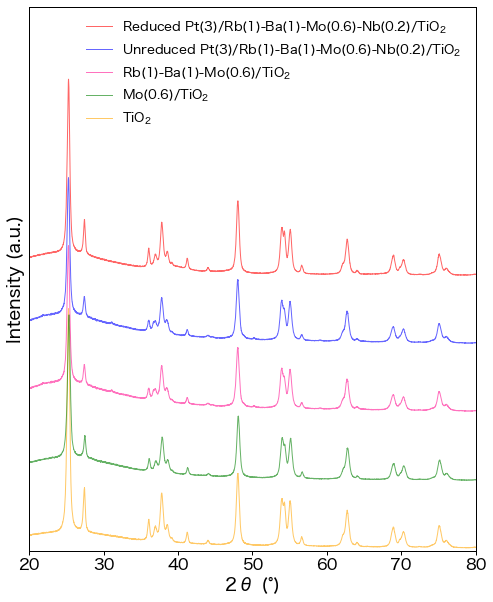

In [15]:
xrd_1 = pd.read_excel(data_path, sheet_name='XRD_Comparison', skiprows=0)

fig, ax = plt.subplots(facecolor='white', figsize=(8, 10))
ax.set_xlim(20, 80)
ax.set_ylim(0, 80000)
ax.axes.yaxis.set_ticks([])
plt.xlabel('2θ (°)', fontsize=18)
plt.ylabel('Intensity (a.u.)', fontsize=18)
ax.tick_params(axis='x', labelsize=16)
ax.plot(xrd_1.iloc[:, 0], xrd_1.iloc[:, 1], color='orange', linestyle='solid', linewidth=1, alpha=0.6, label='$TiO_{2}$')
ax.plot(xrd_1.iloc[:, 2], xrd_1.iloc[:, 3], color='green', linestyle='solid', linewidth=1, alpha=0.6, label='Mo(0.6)/$TiO_{2}$')
ax.plot(xrd_1.iloc[:, 4], xrd_1.iloc[:, 5], color='deeppink', linestyle='solid', linewidth=1, alpha=0.6, label='Rb(1)-Ba(1)-Mo(0.6)/$TiO_{2}$')
ax.plot(xrd_1.iloc[:, 6], xrd_1.iloc[:, 7], color='blue', linestyle='solid', linewidth=1, alpha=0.6, label='Unreduced Pt(3)/Rb(1)-Ba(1)-Mo(0.6)-Nb(0.2)/$TiO_{2}$')
ax.plot(xrd_1.iloc[:, 8], xrd_1.iloc[:, 9], color='red', linestyle='solid', linewidth=1, alpha=0.6, label='Reduced Pt(3)/Rb(1)-Ba(1)-Mo(0.6)-Nb(0.2)/$TiO_{2}$')

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(0.1, 1.0), loc='upper left', markerscale=0.7, fontsize=13, frameon=False)

plt.savefig(f'{PATH}/XRD_Comparison_plot.png', dpi=600, bbox_inches='tight')

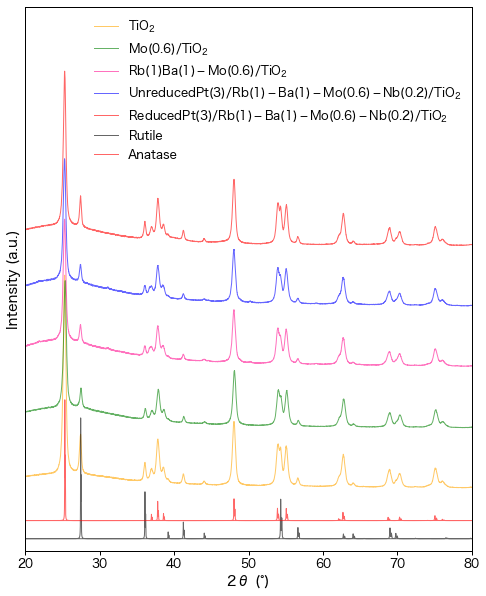

In [106]:
xrd_1 = pd.read_excel(data_path, sheet_name='XRD_Comparison', skiprows=0)
xrd_ref = pd.read_excel(data_path, sheet_name='XRD_ref', skiprows=0)

fig, ax = plt.subplots(facecolor='white', figsize=(8, 10))
ax.set_xlim(20, 80)
ax.set_ylim(0, 90000)
ax.axes.yaxis.set_ticks([])
plt.xlabel('2θ (°)', fontsize=14)
plt.ylabel('Intensity (a.u.)', fontsize=14)
ax.plot(xrd_1.iloc[:, 0], xrd_1.iloc[:, 1]+10000, color='orange', linestyle='solid', linewidth=1, alpha=0.6, label='$TiO_{2}$')
ax.plot(xrd_1.iloc[:, 2], xrd_1.iloc[:, 3]+10000, color='green', linestyle='solid', linewidth=1, alpha=0.6, label='$Mo(0.6)/TiO_{2}$')
ax.plot(xrd_1.iloc[:, 4], xrd_1.iloc[:, 5]+10000, color='deeppink', linestyle='solid', linewidth=1, alpha=0.6, label='$Rb(1)Ba(1)-Mo(0.6)/TiO_{2}$')
ax.plot(xrd_1.iloc[:, 6], xrd_1.iloc[:, 7]+10000, color='blue', linestyle='solid', linewidth=1, alpha=0.6, label='$Unreduced Pt(3)/Rb(1)-Ba(1)-Mo(0.6)-Nb(0.2)/TiO_{2}$')
ax.plot(xrd_1.iloc[:, 8], xrd_1.iloc[:, 9]+10000, color='red', linestyle='solid', linewidth=1, alpha=0.6, label='$Reduced Pt(3)/Rb(1)-Ba(1)-Mo(0.6)-Nb(0.2)/TiO_{2}$')

ax.plot(xrd_ref.iloc[:, 0], (xrd_ref.iloc[:, 1]*200)+2000, color='black', linestyle='solid', linewidth=1, alpha=0.6, label='Rutile')
ax.plot(xrd_ref.iloc[:, 2], (xrd_ref.iloc[:, 3]*200)+5000, color='red', linestyle='solid', linewidth=1, alpha=0.6, label='Anatase')
plt.legend(bbox_to_anchor=(0.13, 1.0), loc='upper left', frameon=False)
plt.savefig(f'{PATH}/XRD_Comparison_plot_with_refs.png', dpi=600, bbox_inches='tight')

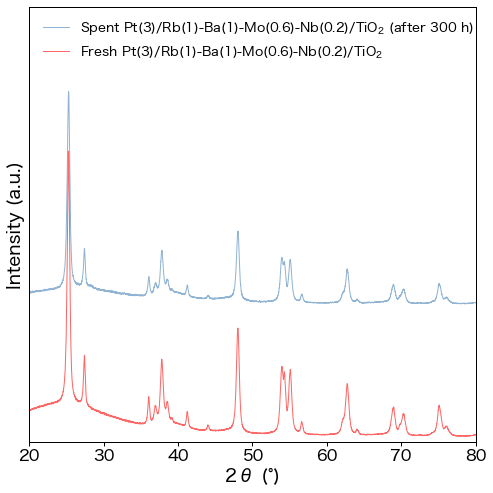

In [20]:
xrd_s = pd.read_excel(data_path, sheet_name='XRD_Fresh_and_Spent', skiprows=0)

fig, ax = plt.subplots(facecolor='white', figsize=(8, 8))
ax.set_xlim(20, 80)
ax.set_ylim(0, 22000)
ax.axes.yaxis.set_ticks([])
plt.xlabel('2θ (°)', fontsize=18)
plt.ylabel('Intensity (a.u.)', fontsize=18)
ax.tick_params(axis='x', labelsize=16)
ax.plot(xrd_s.iloc[:, 0], xrd_s.iloc[:, 1], color='red', linestyle='solid', linewidth=1, alpha=0.6, label='Fresh Pt(3)/Rb(1)-Ba(1)-Mo(0.6)-Nb(0.2)/$TiO_{2}$')
ax.plot(xrd_s.iloc[:, 2], xrd_s.iloc[:, 3], color='steelblue', linestyle='solid', linewidth=1, alpha=0.6, label='Spent Pt(3)/Rb(1)-Ba(1)-Mo(0.6)-Nb(0.2)/$TiO_{2}$ (after 300 h)')

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(0.005, 1.0), loc='upper left', markerscale=0.7, fontsize=13, frameon=False)

#plt.legend(bbox_to_anchor=(0.025, 1.0), loc='upper left', frameon=False)
plt.savefig(f'{PATH}/XRD_Fresh_and_Spent_plot.png', dpi=600, bbox_inches='tight')

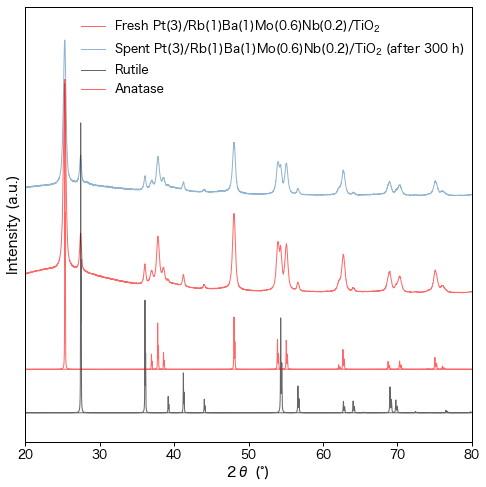

In [76]:
xrd_s = pd.read_excel(data_path, sheet_name='XRD_Fresh_and_Spent', skiprows=0)
xrd_ref = pd.read_excel(data_path, sheet_name='XRD_ref', skiprows=0)

fig, ax = plt.subplots(facecolor='white', figsize=(8, 8))
ax.set_xlim(20, 80)
ax.set_ylim(0, 30000)
ax.axes.yaxis.set_ticks([])
plt.xlabel('2θ (°)', fontsize=14)
plt.ylabel('Intensity (a.u.)', fontsize=14)
ax.plot(xrd_s.iloc[:, 0], xrd_s.iloc[:, 1]+10000, color='red', linestyle='solid', linewidth=1, alpha=0.6, label='Fresh $Pt(3)/Rb(1)Ba(1)Mo(0.6)Nb(0.2)/TiO_{2}$')
ax.plot(xrd_s.iloc[:, 2], xrd_s.iloc[:, 3]+10000, color='steelblue', linestyle='solid', linewidth=1, alpha=0.6, label='Spent $Pt(3)/Rb(1)Ba(1)Mo(0.6)Nb(0.2)/TiO_{2}$ (after 300 h)')

ax.plot(xrd_ref.iloc[:, 0], (xrd_ref.iloc[:, 1]*200)+2000, color='black', linestyle='solid', linewidth=1, alpha=0.6, label='Rutile')
ax.plot(xrd_ref.iloc[:, 2], (xrd_ref.iloc[:, 3]*200)+5000, color='red', linestyle='solid', linewidth=1, alpha=0.6, label='Anatase')

plt.legend(bbox_to_anchor=(0.1, 1.0), loc='upper left', frameon=False)
plt.savefig(f'{PATH}/XRD_Fresh_and_Spent_plot_with_refs.png', dpi=600, bbox_inches='tight')

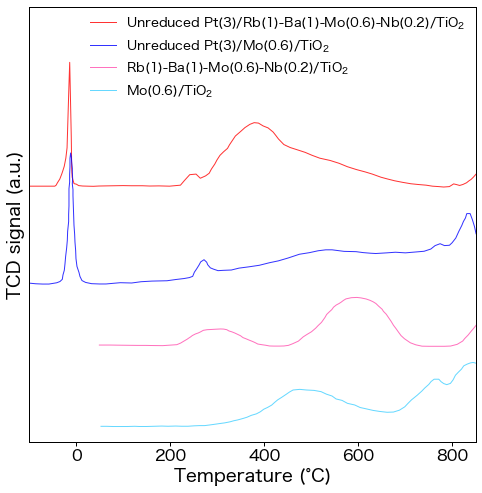

In [21]:
h2_tpr = pd.read_excel(data_path, sheet_name='H2-TPR', skiprows=1)

fig, ax = plt.subplots(facecolor='white', figsize=(8, 8))
ax.set_xlim(-100, 850)
ax.set_ylim(-100, 37000)
ax.axes.yaxis.set_ticks([])
plt.xlabel('Temperature (°C)', fontsize=18)
plt.ylabel('TCD signal (a.u.)', fontsize=18)
ax.tick_params(axis='x', labelsize=16)
ax.plot(h2_tpr.iloc[:, 0], h2_tpr.iloc[:, 1]-5000, color='red', linestyle='solid', linewidth=1, alpha=0.8, label='Unreduced Pt(3)/Rb(1)-Ba(1)-Mo(0.6)-Nb(0.2)/$TiO_{2}$')
ax.plot(h2_tpr.iloc[:, 4], h2_tpr.iloc[:, 5]-5000, color='blue', linestyle='solid', linewidth=1, alpha=0.8, label='Unreduced Pt(3)/Mo(0.6)/$TiO_{2}$')
ax.plot(h2_tpr.iloc[:, 2], h2_tpr.iloc[:, 3]-2000, color='deeppink', linestyle='solid', linewidth=1, alpha=0.6, label='Rb(1)-Ba(1)-Mo(0.6)-Nb(0.2)/$TiO_{2}$')
ax.plot(h2_tpr.iloc[:, 6], h2_tpr.iloc[:, 7], color='deepskyblue', linestyle='solid', linewidth=1, alpha=0.6, label='Mo(0.6)/$TiO_{2}$')
plt.legend(bbox_to_anchor=(0.11, 1.01), loc='upper left', fontsize=13, frameon=False)
plt.savefig(f'{PATH}/H2-TPR_plot.png', dpi=600, bbox_inches='tight')

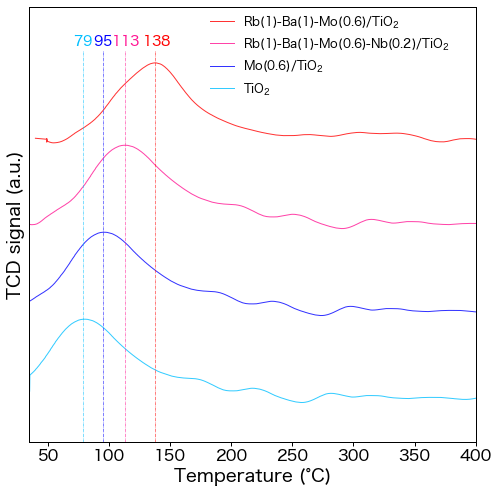

In [25]:
co2_tpd = pd.read_excel(data_path, sheet_name='CO2-TPD', skiprows=1)

fig, ax = plt.subplots(facecolor='white', figsize=(8, 8))
ax.set_xlim(35, 400)
ax.set_ylim(-5, 45)
ax.axes.yaxis.set_ticks([])
plt.xlabel('Temperature (°C)', fontsize=18)
plt.ylabel('TCD signal (a.u.)', fontsize=18)
ax.tick_params(axis='x', labelsize=16)
ax.plot(co2_tpd.iloc[:, 0], co2_tpd.iloc[:, 1], color='red', linestyle='solid', linewidth=1, alpha=0.8, label='Rb(1)-Ba(1)-Mo(0.6)/$TiO_{2}$')
ax.plot(co2_tpd.iloc[:, 2], co2_tpd.iloc[:, 3], color='deeppink', linestyle='solid', linewidth=1, alpha=0.8, label='Rb(1)-Ba(1)-Mo(0.6)-Nb(0.2)/$TiO_{2}$')
ax.plot(co2_tpd.iloc[:, 4], co2_tpd.iloc[:, 5], color='blue', linestyle='solid', linewidth=1, alpha=0.8, label='Mo(0.6)/$TiO_{2}$')
ax.plot(co2_tpd.iloc[:, 6], co2_tpd.iloc[:, 7], color='deepskyblue', linestyle='solid', linewidth=1, alpha=0.8, label='$TiO_{2}$')
plt.legend(bbox_to_anchor=(0.38, 1.01), loc='upper left', frameon=False)


ax.vlines(138, -5, 40, color='red', linewidth=0.5, linestyle='dashdot')
ax.vlines(113, -5, 40, color='deeppink', linewidth=0.5, linestyle='dashdot')
ax.vlines(95, -5, 40, color='blue', linewidth=0.5, linestyle='dashdot')
ax.vlines(79, -5, 40, color='deepskyblue', linewidth=0.5, linestyle='dashdot')

ax.text(138-11, 40.5, "$138$", color='red', fontsize=14)
ax.text(113-11, 40.5, "$113$", color='deeppink', fontsize=14)
ax.text(95-8, 40.5, "$95$", color='blue', fontsize=14)
ax.text(79-8, 40.5, "$79$", color='deepskyblue', fontsize=14)

plt.savefig(f'{PATH}/CO2-TPD_plot.png', dpi=600, bbox_inches='tight')

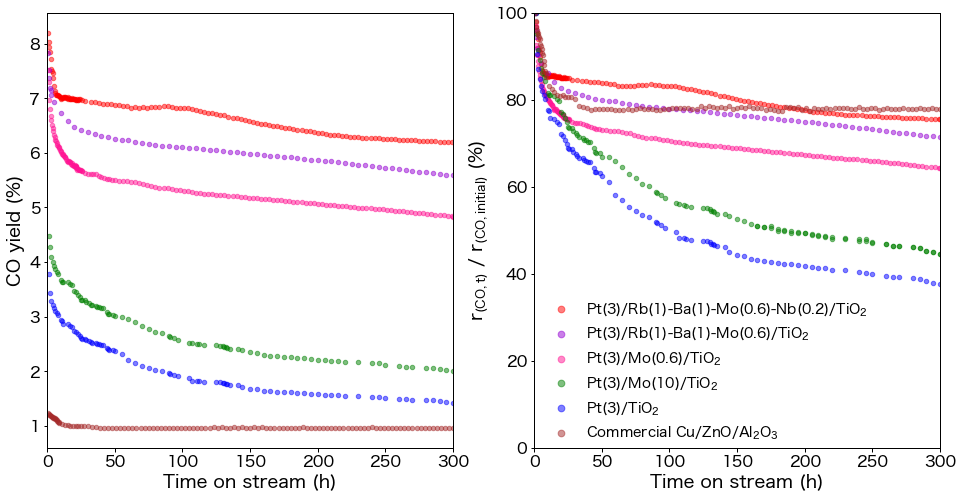

In [29]:
stab_test1 = pd.read_excel(data_path, sheet_name='Stability_A', skiprows=1)
stab_test2 = pd.read_excel(data_path, sheet_name='Stability_B', skiprows=1)

fig, ax = plt.subplots(1, 2, facecolor='white', figsize=(16, 8))


ax[0].set_xlim(0, 300)
ax[0].set_xlabel('Time on stream (h)', fontsize=18)
ax[0].set_ylabel('CO yield (%)', fontsize=18)
ax[0].tick_params(axis='x', labelsize=16)
ax[0].tick_params(axis='y', labelsize=16)
ax[0].scatter(stab_test1.iloc[:, 0], stab_test1.iloc[:, 1], marker="o", s=20, color='red', alpha=0.5, label='Pt(3)/Rb(1)-Ba(1)-Mo(0.6)-Nb(0.2)/$TiO_{2}$')
ax[0].scatter(stab_test1.iloc[:, 4], stab_test1.iloc[:, 5], marker="o", s=20, color='darkviolet', alpha=0.5, label='Pt(3)/Rb(1)-Ba(1)-Mo(0.6)/$TiO_{2}$')
ax[0].scatter(stab_test1.iloc[:, 6], stab_test1.iloc[:, 7], marker="o", s=20, color='deeppink', alpha=0.5, label='Pt(3)/Mo(0.6)/$TiO_{2}$')
ax[0].scatter(stab_test1.iloc[:, 8], stab_test1.iloc[:, 9], marker="o", s=20, color='green', alpha=0.5, label='Pt(3)/Mo(10)/$TiO_{2}$')
ax[0].scatter(stab_test1.iloc[:, 10], stab_test1.iloc[:, 11], marker="o", s=20, color='blue', alpha=0.5, label='Pt(3)/$TiO_{2}$')
ax[0].scatter(stab_test1.iloc[:, 2], stab_test1.iloc[:, 3], marker="o", s=20, color='brown', alpha=0.5, label='Industrial CuZnAl catalyst')

ax[1].set_xlim(0, 300)
ax[1].set_ylim(0, 100)
ax[1].set_xlabel('Time on stream (h)', fontsize=18)
ax[1].set_ylabel('$r_{(CO, t)}$ / $r_{(CO, initial)}$ (%)', fontsize=18)
ax[1].tick_params(axis='x', labelsize=16)
ax[1].tick_params(axis='y', labelsize=16)
ax[1].scatter(stab_test2.iloc[:, 0], stab_test2.iloc[:, 1], marker="o", s=20, color='red', alpha=0.5, label='Pt(3)/Rb(1)-Ba(1)-Mo(0.6)-Nb(0.2)/$TiO_{2}$')
ax[1].scatter(stab_test2.iloc[:, 4], stab_test2.iloc[:, 5], marker="o", s=20, color='darkviolet', alpha=0.5, label='Pt(3)/Rb(1)-Ba(1)-Mo(0.6)/$TiO_{2}$')
ax[1].scatter(stab_test2.iloc[:, 6], stab_test2.iloc[:, 7], marker="o", s=20, color='deeppink', alpha=0.5, label='Pt(3)/Mo(0.6)/$TiO_{2}$')
ax[1].scatter(stab_test2.iloc[:, 8], stab_test2.iloc[:, 9], marker="o", s=20, color='green', alpha=0.5, label='Pt(3)/Mo(10)/$TiO_{2}$')
ax[1].scatter(stab_test2.iloc[:, 10], stab_test2.iloc[:, 11], marker="o", s=20, color='blue', alpha=0.5, label='Pt(3)/$TiO_{2}$')
ax[1].scatter(stab_test2.iloc[:, 2], stab_test2.iloc[:, 3], marker="o", s=20, color='brown', alpha=0.5, label='Commercial $Cu/ZnO/Al_{2}O_{3}$')

plt.legend(bbox_to_anchor=(0, 0.37), loc='upper left', markerscale=1.5, fontsize=14, frameon=False)
plt.savefig(f'{PATH}/Stability_plot_AB.png', dpi=600, bbox_inches='tight')

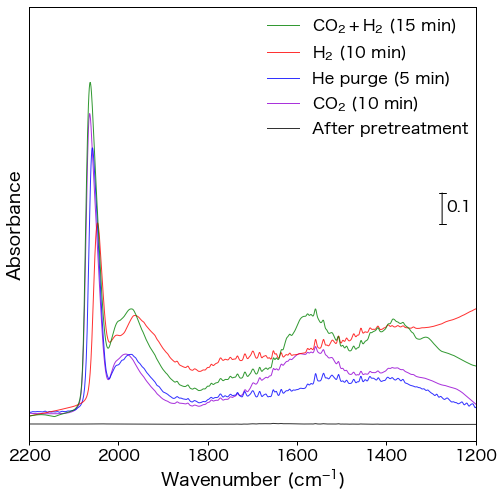

In [43]:
ir_best1 = pd.read_excel(data_path, sheet_name='IR_best_py', skiprows=0)

fig, ax[0] = plt.subplots(1, 1, facecolor='white', figsize=(8, 8))
ax[0].set_xlim(2200, 1200)
ax[0].set_ylim(-0.05, 1.2)
ax[0].axes.yaxis.set_ticks([])
ax[0].set_xlabel('Wavenumber ($cm^{-1}$)', fontsize=18)
ax[0].set_ylabel('Absorbance', fontsize=18)
ax[0].tick_params(axis='x', labelsize=16)
ax[0].plot(ir_best1.iloc[:, 0], ir_best1.iloc[:, 1], color='black', linestyle='solid', linewidth=1, alpha=0.8, label='After pretreatment')
ax[0].plot(ir_best1.iloc[:, 0], ir_best1.iloc[:, 2]+0.08, color='darkviolet', linestyle='solid', linewidth=1, alpha=0.8, label='$CO_{2}$ (10 min)')
ax[0].plot(ir_best1.iloc[:, 0], ir_best1.iloc[:, 3]+0.061, color='blue', linestyle='solid', linewidth=1, alpha=0.8, label='He purge (5 min)')
ax[0].plot(ir_best1.iloc[:, 0], ir_best1.iloc[:, 4]+0.28, color='red', linestyle='solid', linewidth=1, alpha=0.8, label='$H_{2}$ (10 min)')
ax[0].plot(ir_best1.iloc[:, 0], ir_best1.iloc[:, 5]+0.15, color='green', linestyle='solid', linewidth=1, alpha=0.8, label='$CO_{2} + H_{2}$ (15 min)')
arrow([1275, 0.57], [1275, 0.67], i=0)
ax[0].text(1275-10, (0.57+0.67)/2-0.01, '0.1', fontsize=16)

handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(reversed(handles), reversed(labels), bbox_to_anchor=(0.5,1.01), loc='upper left', markerscale=0.7, fontsize=16, frameon=False)

plt.savefig(f'{PATH}/operando_IR_plot_best_200C_basic.png', dpi=600, bbox_inches='tight')

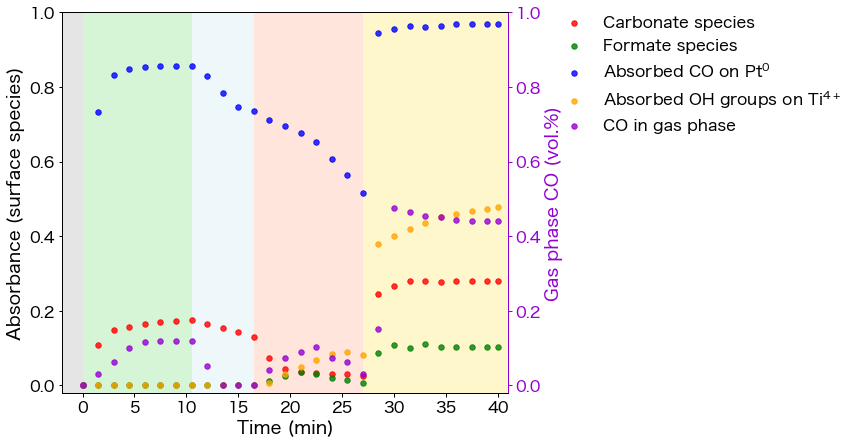

In [45]:
ir_best_plot = pd.read_excel(data_path, sheet_name='IR_best_plot', skiprows=1)

fig, ax1 = plt.subplots(facecolor='white', figsize=(8,7))
ax2 = ax1.twinx()
#ax2.spines['top'].set_color(ax2_color)
ax2_color = 'darkviolet'
ax2.spines['right'].set_color(ax2_color)
ax2.tick_params(direction="out", length=4, colors=ax2_color)
marker_size = 30
alpha_value = 0.8

ax1.set_xlim(-2, 41)
ax1.set_ylim(-0.02, 1)
ax2.set_ylim(-0.02, 1)

ax1.set_xlabel('Time (min)', fontsize=18)
ax1.set_ylabel('Absorbance (surface species)', fontsize=18)
ax2.set_ylabel('Gas phase CO (vol.%)', color=ax2_color, fontsize=18)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)

ax1.scatter(ir_best_plot.iloc[:, 0], ir_best_plot.iloc[:, 1], marker="o", s=marker_size, color='red', alpha=alpha_value, zorder=1, label='Carbonate species')
ax1.scatter(ir_best_plot.iloc[:, 8], ir_best_plot.iloc[:, 9], marker="o", s=marker_size, color='green', alpha=alpha_value, zorder=1, label='Formate species')
ax1.scatter(ir_best_plot.iloc[:, 4], ir_best_plot.iloc[:, 5], marker="o", s=marker_size, color='blue', alpha=alpha_value, zorder=1, label='Absorbed CO on $Pt^{0}$')
ax1.scatter(ir_best_plot.iloc[:, 6], ir_best_plot.iloc[:, 7], marker="o", s=marker_size, color='orange', alpha=alpha_value, zorder=1, label='Absorbed OH groups on $Ti^{4+}$')

ax1.scatter([], [], marker="o", s=marker_size, color=ax2_color, alpha=alpha_value, label='CO in gas phase')
ax2.scatter(ir_best_plot.iloc[:, 2], ir_best_plot.iloc[:, 3], marker="o", s=marker_size, color=ax2_color, alpha=alpha_value)

ax1.axvspan(-5, 0, zorder=0, alpha=0.2, edgecolor=None, facecolor='grey')
ax1.axvspan(0, 10.5, zorder=0, alpha=0.2, edgecolor=None, facecolor='limegreen')
ax1.axvspan(10.5, 16.5, zorder=0, alpha=0.2, edgecolor=None, facecolor='lightblue')
ax1.axvspan(16.5, 27, zorder=0, alpha=0.2, edgecolor=None, facecolor='coral')
ax1.axvspan(27, 41, zorder=0, alpha=0.2, edgecolor=None, facecolor='gold')

ax1.legend(bbox_to_anchor=(1.08, 1.03), loc='upper left', markerscale=1, fontsize=16, frameon=False)
plt.savefig(f'{PATH}/operando_IR_plot_best_200C_B_all.png', dpi=600, bbox_inches='tight')

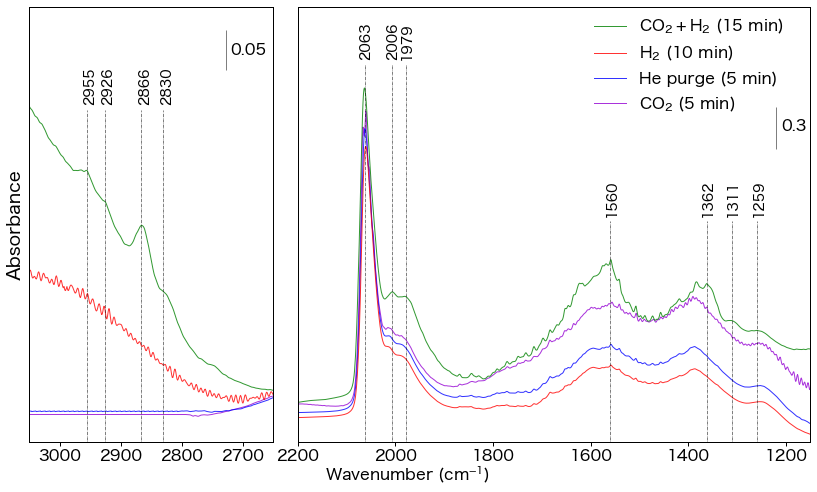

In [60]:
ir_best_200C = pd.read_excel('data/operando_IR_best_cat_200C.xlsx', sheet_name='spectra')
# Under a sequential flow of  CO2 (20 mL min-1), He (40 mL min-1), H2 (60 mL min-1), and CO2 (20 mL min-1) + H2 (60 mL min-1) mixture
# at 200 oC following the H2 reduction pretreatment at 300 oC

fig = plt.figure(facecolor='white', figsize = (14, 8))
plt.subplots_adjust(wspace=0.1)
gs = fig.add_gridspec(3, 3)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[:, 1:3])
ax1.tick_params(labelsize=16)
ax2.tick_params(labelsize=16)
ax1.set_xlim(3050, 2650)
ax1.set_ylim(-0.05, 0.5)
ax1.axes.yaxis.set_ticks([])

ax1.set_ylabel('Absorbance', fontsize=18)
#ax1.plot(ir_best_200C.iloc[:, 0], ir_best_200C.iloc[:, 1], color='black', linestyle='solid', linewidth=1, alpha=0.8, label='After pretreatment')
ax1.plot(ir_best_200C.iloc[:, 0], ir_best_200C.iloc[:, 2], color='darkviolet', linestyle='solid', linewidth=1, alpha=0.8, label='$CO_{2}$ (10 min)')
ax1.plot(ir_best_200C.iloc[:, 0], ir_best_200C.iloc[:, 3], color='blue', linestyle='solid', linewidth=1, alpha=0.8, label='He purge (5 min)')
ax1.plot(ir_best_200C.iloc[:, 0], ir_best_200C.iloc[:, 4], color='red', linestyle='solid', linewidth=1, alpha=0.8, label='$H_{2}$ (10 min)')
ax1.plot(ir_best_200C.iloc[:, 0], ir_best_200C.iloc[:, 5], color='green', linestyle='solid', linewidth=1, alpha=0.8, label='$CO_{2} + H_{2}$ (15 min)')

ax1.vlines(2955, -1, 0.37, color='k', linewidth=0.5, linestyle='dashdot')
ax1.vlines(2926, -1, 0.37, color='k', linewidth=0.5, linestyle='dashdot')
ax1.vlines(2866, -1, 0.37, color='k', linewidth=0.5, linestyle='dashdot')
ax1.vlines(2830, -1, 0.37, color='k', linewidth=0.5, linestyle='dashdot')

ax1.text(2955+6, 0.38, "2955", rotation=90, color='k', fontsize=14)
ax1.text(2926+6, 0.38, "2926", rotation=90, color='k', fontsize=14)
ax1.text(2866+6, 0.38, "2866", rotation=90, color='k', fontsize=14)
ax1.text(2830+6, 0.38, "2830", rotation=90, color='k', fontsize=14)

ax1.vlines(2728, 0.42, 0.47, color='k', linewidth=0.5, linestyle='solid')
ax1.text(2730-9, (0.415+0.465)/2, '0.05', fontsize=16)

ax2.set_xlim(2200, 1150)
ax2.set_ylim(-0.05, 3)
ax2.axes.yaxis.set_ticks([])

#ax2.plot(ir_best_200C.iloc[:, 0], ir_best_200C.iloc[:, 1], color='black', linestyle='solid', linewidth=1, alpha=0.8, label='After pretreatment')
ax2.plot(ir_best_200C.iloc[:, 0], ir_best_200C.iloc[:, 2], color='darkviolet', linestyle='solid', linewidth=1, alpha=0.8, label='$CO_{2}$ (5 min)')
ax2.plot(ir_best_200C.iloc[:, 0], ir_best_200C.iloc[:, 3], color='blue', linestyle='solid', linewidth=1, alpha=0.8, label='He purge (5 min)')
ax2.plot(ir_best_200C.iloc[:, 0], ir_best_200C.iloc[:, 4], color='red', linestyle='solid', linewidth=1, alpha=0.8, label='$H_{2}$ (10 min)')
ax2.plot(ir_best_200C.iloc[:, 0], ir_best_200C.iloc[:, 5], color='green', linestyle='solid', linewidth=1, alpha=0.8, label='$CO_{2} + H_{2}$ (15 min)')

ax2.vlines(2063, -1, 2.6, color='k', linewidth=0.5, linestyle='dashdot')
ax2.vlines(2006, -1, 2.6, color='k', linewidth=0.5, linestyle='dashdot')
ax2.vlines(1979, -1, 2.6, color='k', linewidth=0.5, linestyle='dashdot')
ax2.vlines(1560, -1, 1.5, color='k', linewidth=0.5, linestyle='dashdot')
ax2.vlines(1362, -1, 1.5, color='k', linewidth=0.5, linestyle='dashdot')
ax2.vlines(1311, -1, 1.5, color='k', linewidth=0.5, linestyle='dashdot')
ax2.vlines(1259, -1, 1.5, color='k', linewidth=0.5, linestyle='dashdot')

ax2.text(2063+12, 2.65, "2063", rotation=90, color='k', fontsize=14)
ax2.text(2006+12, 2.65, "2006", rotation=90, color='k', fontsize=14)
ax2.text(1979+12, 2.65, "1979", rotation=90, color='k', fontsize=14)
ax2.text(1560+12, 1.55, "1560", rotation=90, color='k', fontsize=14)
ax2.text(1362+12, 1.55, "1362", rotation=90, color='k', fontsize=14)
ax2.text(1311+12, 1.55, "1311", rotation=90, color='k', fontsize=14)
ax2.text(1259+12, 1.55, "1259", rotation=90, color='k', fontsize=14)

ax2.vlines(1220, 2, 2.3, color='k', linewidth=0.5, linestyle='solid')
ax2.text(1220-10, (2+2.3)/2-0.02, '0.3', fontsize=16)


handles, labels = ax2.get_legend_handles_labels()
ax2.legend(reversed(handles), reversed(labels), bbox_to_anchor=(0.55, 1.01), loc='upper left', markerscale=0.7, frameon=False, fontsize=16)

fig.supxlabel('Wavenumber ($cm^{-1}$)', y=0.05, fontsize=16)

plt.savefig(f'{PATH}/operando_IR_plot_best_200C_A.png', dpi=600, bbox_inches='tight')

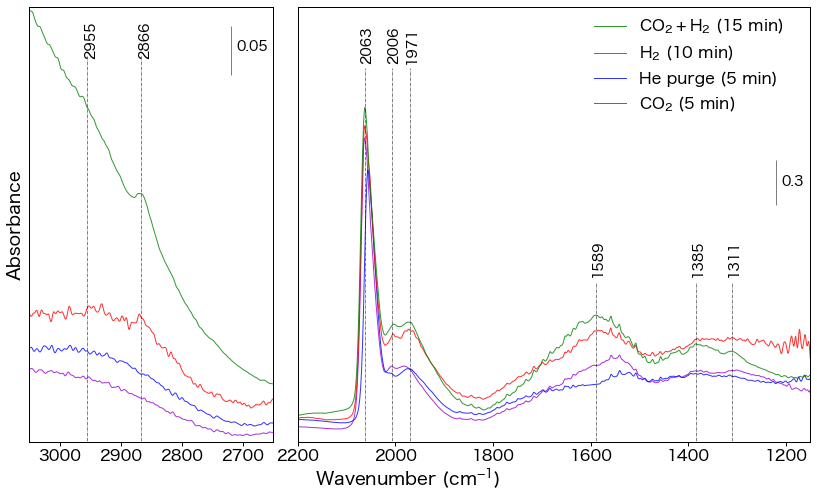

In [66]:
ir_best_250C = pd.read_excel('data/operando_IR_best_cat_250C.xlsx', sheet_name='spectra')
# Under a sequential flow of  CO2 (20 mL min-1), He (40 mL min-1), H2 (60 mL min-1), and CO2 (20 mL min-1) + H2 (60 mL min-1) mixture
# at 250 oC following the H2 reduction pretreatment at 300 oC

fig = plt.figure(facecolor='white', figsize = (14, 8))
plt.subplots_adjust(wspace=0.1)
gs = fig.add_gridspec(3, 3)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[:, 1:3])
ax1.tick_params(labelsize=16)
ax2.tick_params(labelsize=16)

ax1.set_xlim(3050, 2650)
ax1.set_ylim(-0.05, 0.4)
ax1.axes.yaxis.set_ticks([])

ax1.set_ylabel('Absorbance', fontsize=18)
#ax1.plot(ir_best_250C.iloc[:, 0], ir_best_250C.iloc[:, 1], color='black', linestyle='solid', linewidth=1, alpha=0.8, label='After pretreatment')
ax1.plot(ir_best_250C.iloc[:, 0], ir_best_250C.iloc[:, 2]-0.18, color='darkviolet', linestyle='solid', linewidth=1, alpha=0.8, label='$CO_{2}$ (10 min)')
ax1.plot(ir_best_250C.iloc[:, 0], ir_best_250C.iloc[:, 3]-0.21, color='blue', linestyle='solid', linewidth=1, alpha=0.8, label='He purge (5 min)')
ax1.plot(ir_best_250C.iloc[:, 0], ir_best_250C.iloc[:, 4]-0.29, color='red', linestyle='solid', linewidth=1, alpha=0.8, label='$H_{2}$ (10 min)')
ax1.plot(ir_best_250C.iloc[:, 0], ir_best_250C.iloc[:, 5]-0.09, color='green', linestyle='solid', linewidth=1, alpha=0.8, label='$CO_{2} + H_{2}$ (15 min)')

ax1.vlines(2955, -1, 0.35, color='k', linewidth=0.5, linestyle='dashdot')
#ax1.vlines(2926, -1, 0.35, color='k', linewidth=0.5, linestyle='dashdot')
ax1.vlines(2866, -1, 0.35, color='k', linewidth=0.5, linestyle='dashdot')
#ax1.vlines(2830, -1, 0.35, color='k', linewidth=0.5, linestyle='dashdot')

ax1.text(2955+5, 0.35, "2955", rotation=90, color='k', fontsize=14)
#ax1.text(2926+5, 0.35, "2926", rotation=90, color='k', fontsize=14)
ax1.text(2866+5, 0.35, "2866", rotation=90, color='k', fontsize=14)
#ax1.text(2830+5, 0.35, "2830", rotation=90, color='k', fontsize=14)

ax1.vlines(2720, 0.33, 0.38, color='k', linewidth=0.5, linestyle='solid')
ax1.text(2720-10, (0.33+0.38)/2, '0.05', fontsize=14)

ax2.set_xlim(2200, 1150)
ax2.set_ylim(-0.05, 2.8)
ax2.axes.yaxis.set_ticks([])

#ax2.plot(ir_best_250C.iloc[:, 0], ir_best_250C.iloc[:, 1], color='black', linestyle='solid', linewidth=1, alpha=0.8, label='After pretreatment')
ax2.plot(ir_best_250C.iloc[:, 0], ir_best_250C.iloc[:, 2]-0.18, color='darkviolet', linestyle='solid', linewidth=1, alpha=0.8, label='$CO_{2}$ (5 min)')
ax2.plot(ir_best_250C.iloc[:, 0], ir_best_250C.iloc[:, 3]-0.21, color='blue', linestyle='solid', linewidth=1, alpha=0.8, label='He purge (5 min)')
ax2.plot(ir_best_250C.iloc[:, 0], ir_best_250C.iloc[:, 4]-0.29-0.1, color='red', linestyle='solid', linewidth=1, alpha=0.8, label='$H_{2}$ (10 min)')
ax2.plot(ir_best_250C.iloc[:, 0], ir_best_250C.iloc[:, 5]-0.09-0.05, color='green', linestyle='solid', linewidth=1, alpha=0.8, label='$CO_{2} + H_{2}$ (15 min)')

ax2.vlines(2063, -1, 2.4, color='k', linewidth=0.5, linestyle='dashdot')
ax2.vlines(2006, -1, 2.4, color='k', linewidth=0.5, linestyle='dashdot')
ax2.vlines(1971, -1, 2.4, color='k', linewidth=0.5, linestyle='dashdot')
ax2.vlines(1589, -1, 1, color='k', linewidth=0.5, linestyle='dashdot')
ax2.vlines(1385, -1, 1, color='k', linewidth=0.5, linestyle='dashdot')
ax2.vlines(1311, -1, 1, color='k', linewidth=0.5, linestyle='dashdot')
#ax2.vlines(1259, -1, 1, color='k', linewidth=0.5, linestyle='dashdot')

ax2.text(2063+10, 2.45, "2063", rotation=90, color='k', fontsize=14)
ax2.text(2006+10, 2.45, "2006", rotation=90, color='k', fontsize=14)
ax2.text(1971+10, 2.45, "1971", rotation=90, color='k', fontsize=14)
ax2.text(1589+10, 1.05, "1589", rotation=90, color='k', fontsize=14)
ax2.text(1385+10, 1.05, "1385", rotation=90, color='k', fontsize=14)
ax2.text(1311+10, 1.05, "1311", rotation=90, color='k', fontsize=14)
#ax2.text(1259+10, 1.05, "1259", rotation=90, color='k', fontsize=14)

ax2.vlines(1220, 1.5, 1.8, color='k', linewidth=0.5, linestyle='solid')
ax2.text(1220-10, (1.5+1.8)/2-0.02, '0.3', fontsize=14)


handles, labels = ax2.get_legend_handles_labels()
ax2.legend(reversed(handles), reversed(labels), bbox_to_anchor=(0.55, 1.01), loc='upper left', markerscale=0.7, fontsize=16, frameon=False)

fig.supxlabel('Wavenumber ($cm^{-1}$)', y=0.04, fontsize=18)

plt.savefig(f'{PATH}/operando_IR_plot_best_250C_A.png', dpi=600, bbox_inches='tight')

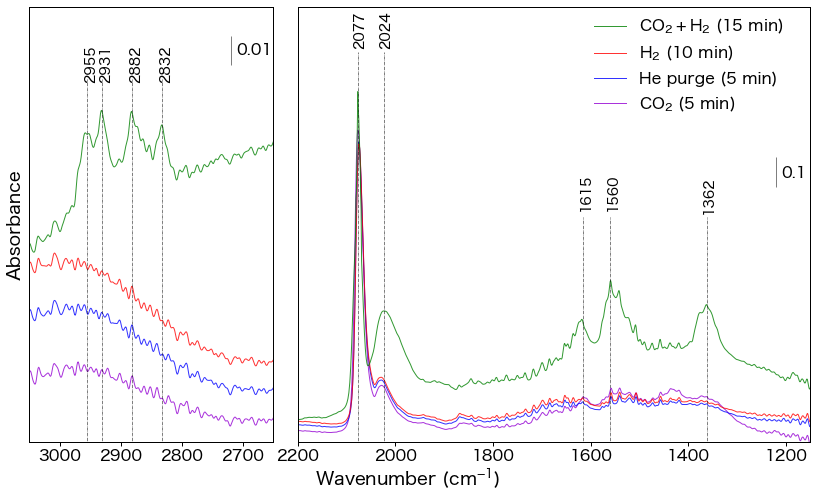

In [68]:
ir_PtMoTiO2_200C = pd.read_excel('data/operando_IR_PtMoTiO2_200C.xlsx', sheet_name='spectra')
# Under a sequential flow of  CO2 (20 mL min-1), He (40 mL min-1), H2 (60 mL min-1), and CO2 (20 mL min-1) + H2 (60 mL min-1) mixture
# at 200 oC following the H2 reduction pretreatment at 300 oC

fig = plt.figure(facecolor='white', figsize = (14, 8))
plt.subplots_adjust(wspace=0.1)
gs = fig.add_gridspec(3, 3)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[:, 1:3])
ax1.tick_params(labelsize=16)
ax2.tick_params(labelsize=16)

ax1.set_xlim(3050, 2650)
ax1.set_ylim(-0.05, 0.1)
ax1.axes.yaxis.set_ticks([])

ax1.set_ylabel('Absorbance', fontsize=18)
#ax1.plot(ir_PtMoTiO2_200C.iloc[:, 0], ir_PtMoTiO2_200C.iloc[:, 1], color='black', linestyle='solid', linewidth=1, alpha=0.8, label='After pretreatment')
ax1.plot(ir_PtMoTiO2_200C.iloc[:, 0], ir_PtMoTiO2_200C.iloc[:, 2]-0.095, color='darkviolet', linestyle='solid', linewidth=1, alpha=0.8, label='$CO_{2}$ (10 min)')
ax1.plot(ir_PtMoTiO2_200C.iloc[:, 0], ir_PtMoTiO2_200C.iloc[:, 3]-0.08, color='blue', linestyle='solid', linewidth=1, alpha=0.8, label='He purge (5 min)')
ax1.plot(ir_PtMoTiO2_200C.iloc[:, 0], ir_PtMoTiO2_200C.iloc[:, 4]-0.03, color='red', linestyle='solid', linewidth=1, alpha=0.8, label='$H_{2}$ (10 min)')
ax1.plot(ir_PtMoTiO2_200C.iloc[:, 0], ir_PtMoTiO2_200C.iloc[:, 5]-0.05, color='green', linestyle='solid', linewidth=1, alpha=0.8, label='$CO_{2} + H_{2}$ (15 min)')

ax1.vlines(2955, -1, 0.075, color='k', linewidth=0.5, linestyle='dashdot')
ax1.vlines(2931, -1, 0.075, color='k', linewidth=0.5, linestyle='dashdot')
ax1.vlines(2882, -1, 0.075, color='k', linewidth=0.5, linestyle='dashdot')
ax1.vlines(2832, -1, 0.075, color='k', linewidth=0.5, linestyle='dashdot')

ax1.text(2955+5, 0.075, "2955", rotation=90, color='k', fontsize=14)
ax1.text(2931+5, 0.075, "2931", rotation=90, color='k', fontsize=14)
ax1.text(2882+5, 0.075, "2882", rotation=90, color='k', fontsize=14)
ax1.text(2832+5, 0.075, "2832", rotation=90, color='k', fontsize=14)

ax1.vlines(2720, 0.08, 0.09, color='k', linewidth=0.5, linestyle='solid')
ax1.text(2720-10, (0.08+0.09)/2-0.0015, '0.01', fontsize=16)

ax2.set_xlim(2200, 1150)
ax2.set_ylim(-0.05, 1.4)
ax2.axes.yaxis.set_ticks([])

#ax2.plot(ir_PtMoTiO2_200C.iloc[:, 0], ir_PtMoTiO2_200C.iloc[:, 1], color='black', linestyle='solid', linewidth=1, alpha=0.8, label='After pretreatment')
ax2.plot(ir_PtMoTiO2_200C.iloc[:, 0], ir_PtMoTiO2_200C.iloc[:, 2]-0.095, color='darkviolet', linestyle='solid', linewidth=1, alpha=0.8, label='$CO_{2}$ (5 min)')
ax2.plot(ir_PtMoTiO2_200C.iloc[:, 0], ir_PtMoTiO2_200C.iloc[:, 3]-0.08, color='blue', linestyle='solid', linewidth=1, alpha=0.8, label='He purge (5 min)')
ax2.plot(ir_PtMoTiO2_200C.iloc[:, 0], ir_PtMoTiO2_200C.iloc[:, 4]-0.03, color='red', linestyle='solid', linewidth=1, alpha=0.8, label='$H_{2}$ (10 min)')
ax2.plot(ir_PtMoTiO2_200C.iloc[:, 0], ir_PtMoTiO2_200C.iloc[:, 5]-0.05-0.1, color='green', linestyle='solid', linewidth=1, alpha=0.8, label='$CO_{2} + H_{2}$ (15 min)')

ax2.vlines(2077, -1, 1.25, color='k', linewidth=0.5, linestyle='dashdot')
ax2.vlines(2024, -1, 1.25, color='k', linewidth=0.5, linestyle='dashdot')
#ax2.vlines(1979, -1, 1.25, color='k', linewidth=0.5, linestyle='dashdot')
ax2.vlines(1615, -1, 0.7, color='k', linewidth=0.5, linestyle='dashdot')
ax2.vlines(1560, -1, 0.7, color='k', linewidth=0.5, linestyle='dashdot')
ax2.vlines(1362, -1, 0.7, color='k', linewidth=0.5, linestyle='dashdot')
#ax2.vlines(1311, -1, 0.7, color='k', linewidth=0.5, linestyle='dashdot')
#ax2.vlines(1259, -1, 0.7, color='k', linewidth=0.5, linestyle='dashdot')

ax2.text(2077+10, 1.27, "2077", rotation=90, color='k', fontsize=14)
ax2.text(2024+10, 1.27, "2024", rotation=90, color='k', fontsize=14)
#ax2.text(1979+10, 1.27, "1979", rotation=90, color='k', fontsize=14)
ax2.text(1615+10, 0.73, "1615", rotation=90, color='k', fontsize=14)
ax2.text(1560+10, 0.73, "1560", rotation=90, color='k', fontsize=14)
ax2.text(1362+10, 0.72, "1362", rotation=90, color='k', fontsize=14)
#ax2.text(1311+10, 0.72, "1311", rotation=90, color='k', fontsize=14)
#ax2.text(1259+10, 0.72, "1259", rotation=90, color='k', fontsize=14)

ax2.vlines(1220, 0.8, 0.9, color='k', linewidth=0.5, linestyle='solid')
ax2.text(1220-10, (0.8+0.9)/2-0.02, '0.1', fontsize=16)


handles, labels = ax2.get_legend_handles_labels()
ax2.legend(reversed(handles), reversed(labels), bbox_to_anchor=(0.55, 1.01), loc='upper left', markerscale=0.7, fontsize=16, frameon=False)

fig.supxlabel('Wavenumber ($cm^{-1}$)', y=0.04, fontsize=18)

plt.savefig(f'{PATH}/operando_IR_plot_PtMoTiO2_200C_A.png', dpi=600, bbox_inches='tight')

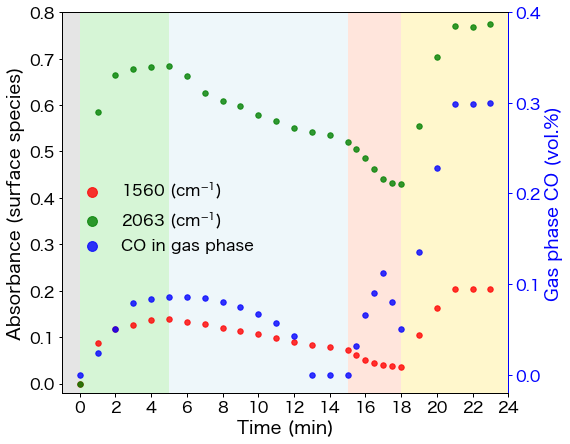

In [69]:
ir_best_200C_plot = pd.read_excel('data/operando_IR_best_cat_200C.xlsx', sheet_name='time_plot', skiprows=1)

fig, ax1 = plt.subplots(facecolor='white', figsize=(8, 7))
ax2 = ax1.twinx()
#ax2.spines['top'].set_color(ax2_color)
ax2_color = 'blue'
ax2.spines['right'].set_color(ax2_color)
ax2.tick_params(direction="out", length=4, colors=ax2_color)
marker_size = 30
alpha_value = 0.8

ax1.set_xlim(-1, 24)
plt.xticks(np.arange(0, 26, 2))
ax1.set_ylim(-0.02, 0.8)
ax2.set_ylim(-0.02, 0.4)
ax2.set_yticks(np.arange(0, 0.5, 0.1))

ax1.set_xlabel('Time (min)', fontsize=18)
ax1.set_ylabel('Absorbance (surface species)', fontsize=18)
ax2.set_ylabel('Gas phase CO (vol.%)', color=ax2_color, fontsize=18)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)

ax1.scatter(ir_best_200C_plot.iloc[:, 0], ir_best_200C_plot.iloc[:, 1], marker="o", s=marker_size, color='red', alpha=alpha_value, zorder=1, label='1560 ($cm^{-1}$)')
#ax1.scatter(ir_best_200C_plot.iloc[:, 8], ir_best_200C_plot.iloc[:, 9], marker="o", s=marker_size, color='green', alpha=alpha_value, zorder=1, label='Formate species')
ax1.scatter(ir_best_200C_plot.iloc[:, 4], ir_best_200C_plot.iloc[:, 5], marker="o", s=marker_size, color='green', alpha=alpha_value, zorder=2, label='2063 ($cm^{-1}$)')

ax1.scatter([], [], marker="o", s=marker_size, color=ax2_color, alpha=alpha_value, label='CO in gas phase')
ax2.scatter(ir_best_200C_plot.iloc[:, 2], ir_best_200C_plot.iloc[:, 3], marker="o", s=marker_size, color=ax2_color, alpha=alpha_value)

ax1.axvspan(-5, 0, zorder=0, alpha=0.2, edgecolor=None, facecolor='grey')
ax1.axvspan(0, 5, zorder=0, alpha=0.2, edgecolor=None, facecolor='limegreen')
ax1.axvspan(5, 15, zorder=0, alpha=0.2, edgecolor=None, facecolor='lightblue')
ax1.axvspan(15, 18, zorder=0, alpha=0.2, edgecolor=None, facecolor='coral')
ax1.axvspan(18, 24, zorder=0, alpha=0.2, edgecolor=None, facecolor='gold')

ax1.legend(bbox_to_anchor=(0, 0.6), loc='upper left', markerscale=1.8, fontsize=16, frameon=False)
plt.savefig(f'{PATH}/operando_IR_plot_best_200C_B.png', dpi=600, bbox_inches='tight')


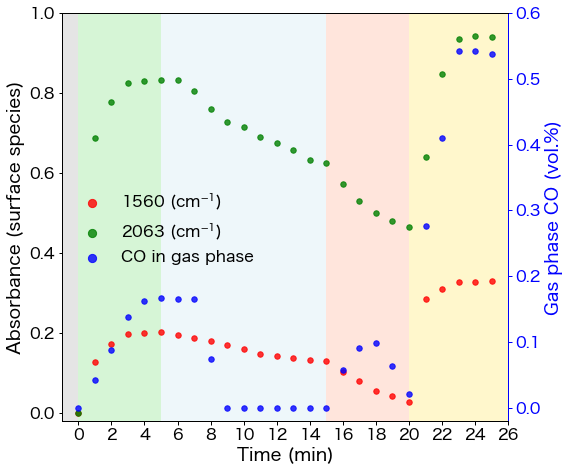

In [70]:
ir_best_250C_plot = pd.read_excel('data/operando_IR_best_cat_250C.xlsx', sheet_name='time_plot', skiprows=1)

fig, ax1 = plt.subplots(facecolor='white', figsize=(8,7.5))
ax2 = ax1.twinx()
#ax2.spines['top'].set_color(ax2_color)
ax2_color = 'blue'
ax2.spines['right'].set_color(ax2_color)
ax2.tick_params(direction="out", length=4, colors=ax2_color)
marker_size = 30
alpha_value = 0.8

ax1.set_xlim(-1, 26)
plt.xticks( np.arange(0, 27, 2))
ax1.set_ylim(-0.02, 1.0)
ax2.set_ylim(-0.02, 0.6)

ax1.set_xlabel('Time (min)', fontsize=18)
ax1.set_ylabel('Absorbance (surface species)', fontsize=18)
ax2.set_ylabel('Gas phase CO (vol.%)', color=ax2_color, fontsize=18)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)

ax1.scatter(ir_best_250C_plot.iloc[:, 0], ir_best_250C_plot.iloc[:, 1], marker="o", s=marker_size, color='red', alpha=alpha_value, zorder=1, label='1560 ($cm^{-1}$)')
#ax1.scatter(ir_best_250C_plot.iloc[:, 8], ir_best_250C_plot.iloc[:, 9], marker="o", s=marker_size, color='green', alpha=alpha_value, zorder=1, label='Formate species')
ax1.scatter(ir_best_250C_plot.iloc[:, 4], ir_best_250C_plot.iloc[:, 5], marker="o", s=marker_size, color='green', alpha=alpha_value, zorder=2, label='2063 ($cm^{-1}$)')

ax1.scatter([], [], marker="o", s=marker_size, color=ax2_color, alpha=alpha_value, label='CO in gas phase')
ax2.scatter(ir_best_250C_plot.iloc[:, 2], ir_best_250C_plot.iloc[:, 3], marker="o", s=marker_size, color=ax2_color, alpha=alpha_value)

ax1.axvspan(-5, 0, zorder=0, alpha=0.2, edgecolor=None, facecolor='grey')
ax1.axvspan(0, 5, zorder=0, alpha=0.2, edgecolor=None, facecolor='limegreen')
ax1.axvspan(5, 15, zorder=0, alpha=0.2, edgecolor=None, facecolor='lightblue')
ax1.axvspan(15, 20, zorder=0, alpha=0.2, edgecolor=None, facecolor='coral')
ax1.axvspan(20, 26, zorder=0, alpha=0.2, edgecolor=None, facecolor='gold')

ax1.legend(bbox_to_anchor=(0, 0.6), loc='upper left', markerscale=1.5, fontsize=16, frameon=False)
plt.savefig(f'{PATH}/operando_IR_plot_best_250C_B.png', dpi=600, bbox_inches='tight')


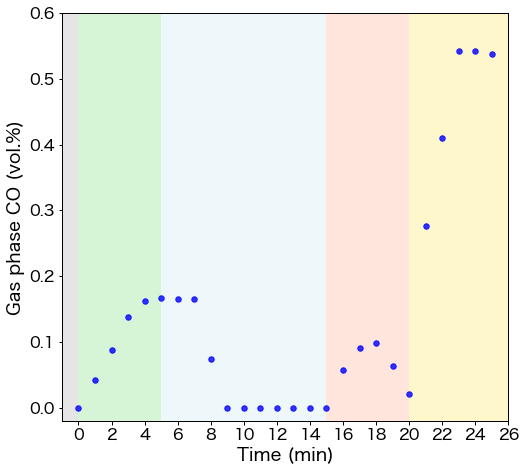

In [71]:
ir_best_250C_plot = pd.read_excel('data/operando_IR_best_cat_250C.xlsx', sheet_name='time_plot', skiprows=1)

fig, ax1 = plt.subplots(facecolor='white', figsize=(8,7.5))

marker_size = 30
alpha_value = 0.8

ax1.set_xlim(-1, 26)
plt.xticks( np.arange(0, 27, 2))
ax1.set_ylim(-0.02, 0.6)
#ax2.set_ylim(-0.02, 0.6)

ax1.set_xlabel('Time (min)', fontsize=18)
#ax1.set_ylabel('Absorbance (surface species)', fontsize=18)
ax1.set_ylabel('Gas phase CO (vol.%)', fontsize=18)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
#ax2.tick_params(axis='y', labelsize=16)

#ax1.scatter(ir_best_250C_plot.iloc[:, 0], ir_best_250C_plot.iloc[:, 1], marker="o", s=marker_size, color='red', alpha=alpha_value, zorder=1, label='1560 ($cm^{-1}$)')
#ax1.scatter(ir_best_250C_plot.iloc[:, 8], ir_best_250C_plot.iloc[:, 9], marker="o", s=marker_size, color='green', alpha=alpha_value, zorder=1, label='Formate species')
#ax1.scatter(ir_best_250C_plot.iloc[:, 4], ir_best_250C_plot.iloc[:, 5], marker="o", s=marker_size, color='green', alpha=alpha_value, zorder=2, label='2063 ($cm^{-1}$)')

#ax1.scatter([], [], marker="o", s=marker_size, color=ax2_color, alpha=alpha_value, label='CO in gas phase')
ax1.scatter(ir_best_250C_plot.iloc[:, 2], ir_best_250C_plot.iloc[:, 3], marker="o", s=marker_size, color='blue', alpha=alpha_value, label='CO in gas phase')

ax1.axvspan(-5, 0, zorder=0, alpha=0.2, edgecolor=None, facecolor='grey')
ax1.axvspan(0, 5, zorder=0, alpha=0.2, edgecolor=None, facecolor='limegreen')
ax1.axvspan(5, 15, zorder=0, alpha=0.2, edgecolor=None, facecolor='lightblue')
ax1.axvspan(15, 20, zorder=0, alpha=0.2, edgecolor=None, facecolor='coral')
ax1.axvspan(20, 26, zorder=0, alpha=0.2, edgecolor=None, facecolor='gold')

#ax1.legend(bbox_to_anchor=(0, 0.6), loc='upper left', markerscale=1.5, fontsize=16, frameon=False)
plt.savefig(f'{PATH}/operando_IR_plot_best_250C_B_CO.png', dpi=600, bbox_inches='tight')


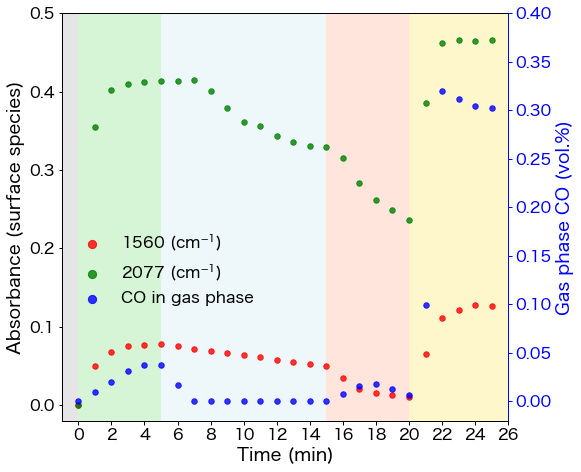

In [72]:
ir_PtMoTIO2_200C_plot = pd.read_excel('data/operando_IR_PtMoTIO2_200C.xlsx', sheet_name='time_plot', skiprows=1)

fig, ax1 = plt.subplots(facecolor='white', figsize=(8,7.5))
ax2 = ax1.twinx()
#ax2.spines['top'].set_color(ax2_color)
ax2_color = 'blue'
ax2.spines['right'].set_color(ax2_color)
ax2.tick_params(direction="out", length=4, colors=ax2_color)
marker_size = 30
alpha_value = 0.8

ax1.set_xlim(-1, 26)
plt.xticks( np.arange(0, 27, 2))
ax1.set_ylim(-0.02, 0.5)
ax2.set_ylim(-0.02, 0.4)

ax1.set_xlabel('Time (min)', fontsize=18)
ax1.set_ylabel('Absorbance (surface species)', fontsize=18)
ax2.set_ylabel('Gas phase CO (vol.%)', color=ax2_color, fontsize=18)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)

ax1.scatter(ir_PtMoTIO2_200C_plot.iloc[:, 0], ir_PtMoTIO2_200C_plot.iloc[:, 1], marker="o", s=marker_size, color='red', alpha=alpha_value, zorder=1, label='1560 ($cm^{-1}$)')
#ax1.scatter(ir_PtMoTIO2_200C_plot.iloc[:, 8], ir_PtMoTIO2_200C_plot.iloc[:, 9], marker="o", s=marker_size, color='green', alpha=alpha_value, zorder=1, label='Formate species')
ax1.scatter(ir_PtMoTIO2_200C_plot.iloc[:, 4], ir_PtMoTIO2_200C_plot.iloc[:, 5], marker="o", s=marker_size, color='green', alpha=alpha_value, zorder=2, label='2077 ($cm^{-1}$)')

ax1.scatter([], [], marker="o", s=marker_size, color=ax2_color, alpha=alpha_value, label='CO in gas phase')
ax2.scatter(ir_PtMoTIO2_200C_plot.iloc[:, 2], ir_PtMoTIO2_200C_plot.iloc[:, 3], marker="o", s=marker_size, color=ax2_color, alpha=alpha_value)

ax1.axvspan(-5, 0, zorder=0, alpha=0.2, edgecolor=None, facecolor='grey')
ax1.axvspan(0, 5, zorder=0, alpha=0.2, edgecolor=None, facecolor='limegreen')
ax1.axvspan(5, 15, zorder=0, alpha=0.2, edgecolor=None, facecolor='lightblue')
ax1.axvspan(15, 20, zorder=0, alpha=0.2, edgecolor=None, facecolor='coral')
ax1.axvspan(20, 26, zorder=0, alpha=0.2, edgecolor=None, facecolor='gold')

ax1.legend(bbox_to_anchor=(0, 0.5), loc='upper left', markerscale=1.5, fontsize=16, frameon=False)
plt.savefig(f'{PATH}/operando_IR_plot_PtMoTIO2_200C_B.png', dpi=600, bbox_inches='tight')


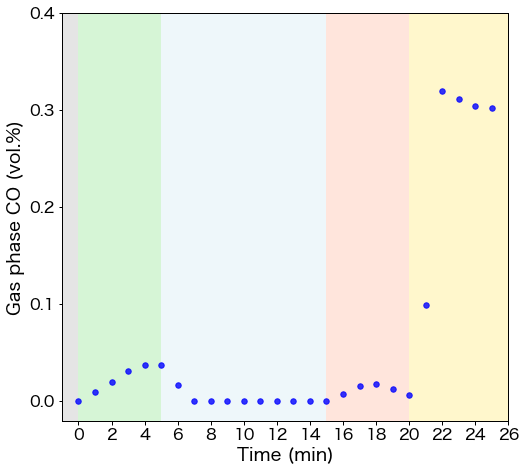

In [73]:
ir_PtMoTIO2_200C_plot = pd.read_excel('data/operando_IR_PtMoTIO2_200C.xlsx', sheet_name='time_plot', skiprows=1)

fig, ax1 = plt.subplots(facecolor='white', figsize=(8,7.5))

marker_size = 30
alpha_value = 0.8

ax1.set_xlim(-1, 26)
plt.xticks( np.arange(0, 27, 2))
#ax1.set_ylim(-0.02, 0.5)
ax1.set_ylim(-0.02, 0.4)
ax1.set_yticks(np.arange(0, 0.5, 0.1))
ax1.set_xlabel('Time (min)', fontsize=18)
#ax1.set_ylabel('Absorbance (surface species)', fontsize=18)
ax1.set_ylabel('Gas phase CO (vol.%)', fontsize=18)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
#ax2.tick_params(axis='y', labelsize=16)

#ax1.scatter(ir_PtMoTIO2_200C_plot.iloc[:, 0], ir_PtMoTIO2_200C_plot.iloc[:, 1], marker="o", s=marker_size, color='red', alpha=alpha_value, zorder=1, label='1560 ($cm^{-1}$)')
#ax1.scatter(ir_PtMoTIO2_200C_plot.iloc[:, 8], ir_PtMoTIO2_200C_plot.iloc[:, 9], marker="o", s=marker_size, color='green', alpha=alpha_value, zorder=1, label='Formate species')
#ax1.scatter(ir_PtMoTIO2_200C_plot.iloc[:, 4], ir_PtMoTIO2_200C_plot.iloc[:, 5], marker="o", s=marker_size, color='green', alpha=alpha_value, zorder=2, label='2077 ($cm^{-1}$)')

#ax1.scatter([], [], marker="o", s=marker_size, color=ax2_color, alpha=alpha_value, label='CO in gas phase')
ax1.scatter(ir_PtMoTIO2_200C_plot.iloc[:, 2], ir_PtMoTIO2_200C_plot.iloc[:, 3], marker="o", s=marker_size, color='blue', alpha=alpha_value)

ax1.axvspan(-5, 0, zorder=0, alpha=0.2, edgecolor=None, facecolor='grey') # pretreatment
ax1.axvspan(0, 5, zorder=0, alpha=0.2, edgecolor=None, facecolor='limegreen') # CO2/He
ax1.axvspan(5, 15, zorder=0, alpha=0.2, edgecolor=None, facecolor='lightblue') # He purge
ax1.axvspan(15, 20, zorder=0, alpha=0.2, edgecolor=None, facecolor='coral') # H2/He
ax1.axvspan(20, 26, zorder=0, alpha=0.2, edgecolor=None, facecolor='gold') # CO2/H2

#ax1.legend(bbox_to_anchor=(0, 0.5), loc='upper left', markerscale=1.5, frameon=False)
plt.savefig(f'{PATH}/operando_IR_plot_PtMoTIO2_200C_B_CO.png', dpi=600, bbox_inches='tight')


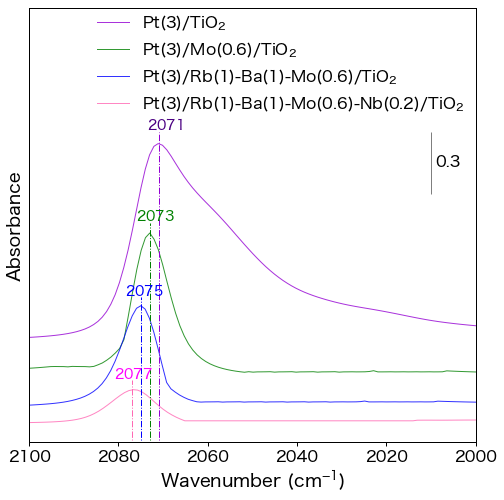

In [76]:
ir_CO_ads = pd.read_excel('data/in-situ_IR_CO_ads_250C.xlsx')

fig, ax = plt.subplots(facecolor='white', figsize=(8, 8))
ax.set_xlim(2100, 2000)
ax.set_ylim(0, 2.1)
ax.axes.yaxis.set_ticks([])
plt.xlabel('Wavenumber ($cm^{-1}$)', fontsize=18)
plt.ylabel('Absorbance', fontsize=18)
plt.tick_params(labelsize=16)
ax.plot(ir_CO_ads.iloc[:, 0], ir_CO_ads.iloc[:, 1]-0.17, color='darkviolet', linestyle='solid', linewidth=1, alpha=0.8, label='Pt(3)/$TiO_{2}$')
ax.plot(ir_CO_ads.iloc[:, 2], ir_CO_ads.iloc[:, 3]-0.12, color='green', linestyle='solid', linewidth=1, alpha=0.8, label='Pt(3)/Mo(0.6)/$TiO_{2}$')
ax.plot(ir_CO_ads.iloc[:, 4], ir_CO_ads.iloc[:, 5]-0.12, color='blue', linestyle='solid', linewidth=1, alpha=0.8, label='Pt(3)/Rb(1)-Ba(1)-Mo(0.6)/$TiO_{2}$')
ax.plot(ir_CO_ads.iloc[:, 6], ir_CO_ads.iloc[:, 7], color='hotpink', linestyle='solid', linewidth=1, alpha=0.8, label='Pt(3)/Rb(1)-Ba(1)-Mo(0.6)-Nb(0.2)/$TiO_{2}$')
plt.legend(bbox_to_anchor=(0.12, 1.02), loc='upper left', fontsize=16, frameon=False)

#handles, labels = ax.get_legend_handles_labels()
#ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(0.3,1.01), loc='upper left', fontsize=12, markerscale=0.7, frameon=False)

ax.vlines(2071, -1, 1.5, color='darkviolet', linewidth=1, linestyle='dashdot')
ax.vlines(2073, -1, 1.06, color='green', linewidth=1, linestyle='dashdot')
ax.vlines(2075, -1, 0.7, color='blue', linewidth=1, linestyle='dashdot')
ax.vlines(2077, -1, 0.3, color='hotpink', linewidth=1, linestyle='dashdot')

ax.text(2071+2.5, 1.51, "$2071$", rotation=0, color='indigo', fontsize=14)
ax.text(2073+3, 1.07, "$2073$", rotation=0, color='green', fontsize=14)
ax.text(2075+3.5, 0.71, "$2075$", rotation=0, color='blue', fontsize=14)
ax.text(2077+4, 0.31, "$2077$", rotation=0, color='magenta', fontsize=14)

ax.vlines(2010, 1.2, 1.5, color='k', linewidth=0.5, linestyle='solid')
ax.text(2010-1, (1.2+1.5)/2-0.02, '0.3', fontsize=16)

plt.savefig(f'{PATH}/in-situ_IR_CO_ads_250C.png', dpi=600, bbox_inches='tight')

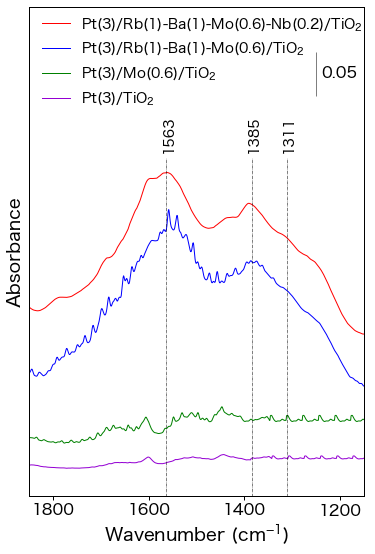

In [79]:
ir_CO2 = pd.read_excel(data_path, sheet_name='IR_CO2', skiprows=1)
#print(ir_CO2.columns)
fig, ax = plt.subplots(facecolor='white', figsize=(6, 9))

ax.set_xlim(1850, 1150)
ax.set_ylim(-0.05, 0.5)
ax.axes.yaxis.set_ticks([])

ax.set_xlabel('Wavenumber ($cm^{-1}$)', fontsize=18)
ax.set_ylabel('Absorbance', fontsize=18)
ax.tick_params(labelsize=16)

ax.plot(ir_CO2.iloc[:, 0], ir_CO2.iloc[:, 3]+0.75, color='darkviolet', linestyle='solid', linewidth=1, alpha=1, label='Pt(3)/$TiO_{2}$')
ax.plot(ir_CO2.iloc[:, 7], ir_CO2.iloc[:, 3+7]+0.27, color='green', linestyle='solid', linewidth=1, alpha=1, label='Pt(3)/Mo(0.6)/$TiO_{2}$')
ax.plot(ir_CO2.iloc[:, 14], ir_CO2.iloc[:, 3+14]-0.25, color='blue', linestyle='solid', linewidth=1, alpha=1, label='Pt(3)/Rb(1)-Ba(1)-Mo(0.6)/$TiO_{2}$')
ax.plot(ir_CO2.iloc[:, 21], ir_CO2.iloc[:, 3+21]-0.6, color='red', linestyle='solid', linewidth=1, alpha=1, label='Pt(3)/Rb(1)-Ba(1)-Mo(0.6)-Nb(0.2)/$TiO_{2}$')

ax.vlines(1250, 0.4, 0.45, color='k', linewidth=0.5, linestyle='solid')
ax.text(1250-10, (0.4+0.45)/2-0.005, '0.05', fontsize=16)

ax.vlines(1563, -1, 0.33, color='k', linewidth=0.5, linestyle='dashdot')
ax.vlines(1385, -1, 0.33, color='k', linewidth=0.5, linestyle='dashdot')
ax.vlines(1311, -1, 0.33, color='k', linewidth=0.5, linestyle='dashdot')
#ax2.vlines(1259, -1, 1, color='k', linewidth=0.5, linestyle='dashdot')

ax.text(1563+10, 0.34, "1563", rotation=90, color='k', fontsize=14)
ax.text(1385+10, 0.34, "1385", rotation=90, color='k', fontsize=14)
ax.text(1311+10, 0.34, "1311", rotation=90, color='k', fontsize=14)
#ax2.text(1259+10, 1.05, "1259", rotation=90, color='k', fontsize=14)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(0.0,1.01), loc='upper left', markerscale=0.7, fontsize=14, frameon=False)

plt.savefig(f'{PATH}/operando_IR_plot_CO2_A.png', dpi=600, bbox_inches='tight')

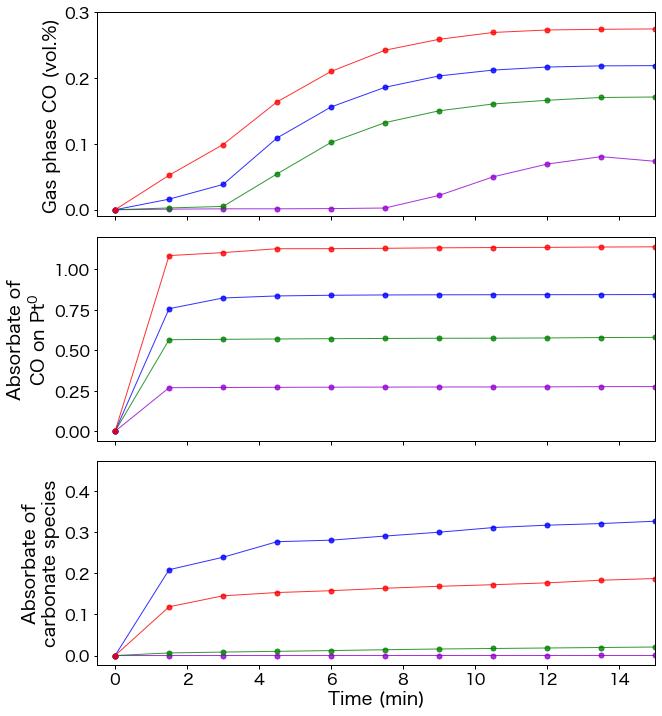

In [81]:
ir_CO2_carbonate = pd.read_excel(data_path, sheet_name='IR_plot_carbonates', skiprows=1)
ir_CO2_ads_CO = pd.read_excel(data_path, sheet_name='IR_plot_ads_CO', skiprows=1)
ir_CO2_gas_CO = pd.read_excel(data_path, sheet_name='IR_plot_gas_CO', skiprows=1)

fig, ax = plt.subplots(3, 1, sharex=True, facecolor='white', figsize=(10, 12))
plt.subplots_adjust(hspace=0.1)

marker_size = 5
alpha_value = 0.8

ax[2].set_xlim(-0.5, 15)
ax[0].set_ylim(-0.01, 0.3)
#ax.set_ylim(-0.05, 0.43) Absorbance

ax[2].set_xlabel('Time (min)', fontsize=18)
ax[0].set_ylabel('Gas phase CO (vol.%)', color='k', fontsize=18)
ax[1].set_ylabel('Absorbate of\nCO on $Pt^{0}$', color='k', fontsize=18)
ax[2].set_ylabel('Absorbate of\ncarbonate species', color='k', fontsize=18)
ax[0].tick_params(axis='y', labelsize=16)
ax[1].tick_params(axis='y', labelsize=16)
ax[2].tick_params(axis='x', labelsize=16)
ax[2].tick_params(axis='y', labelsize=16)

ax[0].plot(ir_CO2_gas_CO.iloc[:, 0], ir_CO2_gas_CO.iloc[:, 1], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='darkviolet')
ax[0].plot(ir_CO2_gas_CO.iloc[:, 2], ir_CO2_gas_CO.iloc[:, 3], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='green')
ax[0].plot(ir_CO2_gas_CO.iloc[:, 4], ir_CO2_gas_CO.iloc[:, 5], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='blue')
ax[0].plot(ir_CO2_gas_CO.iloc[:, 6], ir_CO2_gas_CO.iloc[:, 7], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='red')

ax[1].plot(ir_CO2_ads_CO.iloc[:, 0], ir_CO2_ads_CO.iloc[:, 1], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='darkviolet')
ax[1].plot(ir_CO2_ads_CO.iloc[:, 2], ir_CO2_ads_CO.iloc[:, 3], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='green')
ax[1].plot(ir_CO2_ads_CO.iloc[:, 4], ir_CO2_ads_CO.iloc[:, 5], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='blue')
ax[1].plot(ir_CO2_ads_CO.iloc[:, 6], ir_CO2_ads_CO.iloc[:, 7], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='red')

ax[2].plot(ir_CO2_carbonate.iloc[:, 0], ir_CO2_carbonate.iloc[:, 1], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='darkviolet')
ax[2].plot(ir_CO2_carbonate.iloc[:, 2], ir_CO2_carbonate.iloc[:, 3], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='green')
ax[2].plot(ir_CO2_carbonate.iloc[:, 4], ir_CO2_carbonate.iloc[:, 5], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='blue')
ax[2].plot(ir_CO2_carbonate.iloc[:, 6], ir_CO2_carbonate.iloc[:, 7], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='red')

plt.savefig(f'{PATH}/operando_IR_plot_CO2.png', dpi=600, bbox_inches='tight')

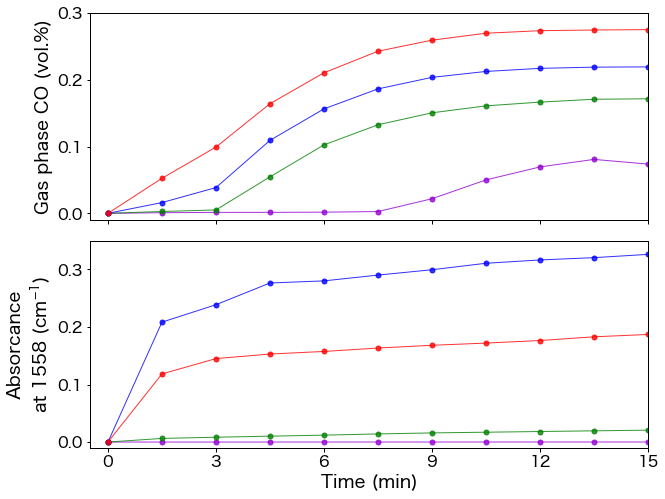

In [84]:
ir_CO2_carbonate = pd.read_excel(data_path, sheet_name='IR_plot_carbonates', skiprows=1)
#ir_CO2_ads_CO = pd.read_excel(data_path, sheet_name='IR_plot_ads_CO', skiprows=1)
ir_CO2_gas_CO = pd.read_excel(data_path, sheet_name='IR_plot_gas_CO', skiprows=1)

fig, ax = plt.subplots(2, 1, sharex=True, facecolor='white', figsize=(10, 8))
plt.subplots_adjust(hspace=0.1)

marker_size = 5
alpha_value = 0.8

ax[1].set_xlim(-0.5, 15)
ax[1].set_xticks(np.arange(0, 16, 3))
ax[0].set_ylim(-0.01, 0.3)
ax[1].set_ylim(-0.01, 0.35)
#ax.set_ylim(-0.05, 0.43) Absorbance

ax[1].set_xlabel('Time (min)', fontsize=18)
ax[0].set_ylabel('Gas phase CO (vol.%)', color='k', fontsize=18)
ax[1].set_ylabel('Absorcance\nat 1558 ($cm^{-1}$)', color='k', fontsize=18)
ax[0].tick_params(axis='y', labelsize=16)
ax[1].tick_params(axis='y', labelsize=16)
ax[1].tick_params(axis='x', labelsize=16)

ax[0].plot(ir_CO2_gas_CO.iloc[:, 0], ir_CO2_gas_CO.iloc[:, 1], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='darkviolet')
ax[0].plot(ir_CO2_gas_CO.iloc[:, 2], ir_CO2_gas_CO.iloc[:, 3], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='green')
ax[0].plot(ir_CO2_gas_CO.iloc[:, 4], ir_CO2_gas_CO.iloc[:, 5], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='blue')
ax[0].plot(ir_CO2_gas_CO.iloc[:, 6], ir_CO2_gas_CO.iloc[:, 7], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='red')

ax[1].plot(ir_CO2_carbonate.iloc[:, 0], ir_CO2_carbonate.iloc[:, 1], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='darkviolet')
ax[1].plot(ir_CO2_carbonate.iloc[:, 2], ir_CO2_carbonate.iloc[:, 3], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='green')
ax[1].plot(ir_CO2_carbonate.iloc[:, 4], ir_CO2_carbonate.iloc[:, 5], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='blue')
ax[1].plot(ir_CO2_carbonate.iloc[:, 6], ir_CO2_carbonate.iloc[:, 7], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='red')

plt.savefig(f'{PATH}/operando_IR_plot_CO2_B.png', dpi=600, bbox_inches='tight')

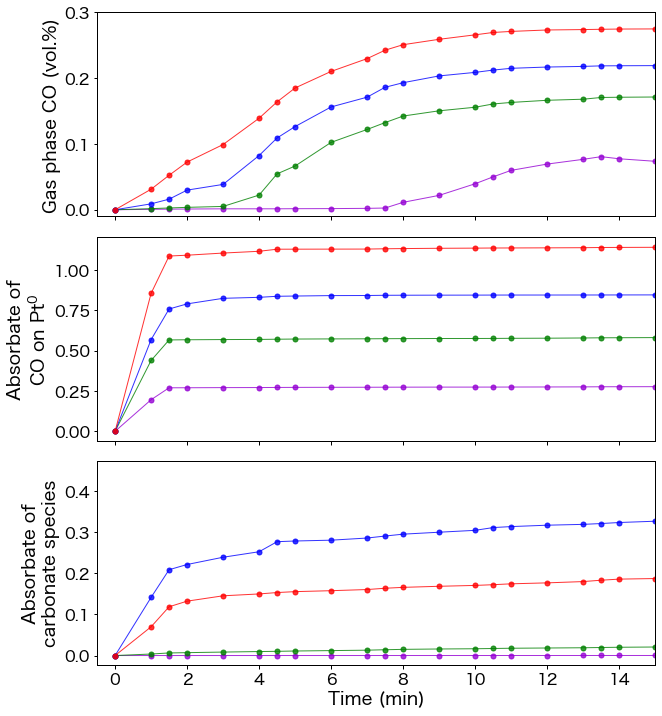

In [83]:
new_data = 'data/in_situ_IR_CO2_ads_Best_cat_NEW.xlsx'

ir_CO2_carbonate = pd.read_excel(new_data, sheet_name='IR_plot_carbonates', skiprows=1)
ir_CO2_ads_CO = pd.read_excel(new_data, sheet_name='IR_plot_ads_CO', skiprows=1)
ir_CO2_gas_CO = pd.read_excel(new_data, sheet_name='IR_plot_gas_CO', skiprows=1)

fig, ax = plt.subplots(3, 1, sharex=True, facecolor='white', figsize=(10, 12))
plt.subplots_adjust(hspace=0.1)

marker_size = 5
alpha_value = 0.8

ax[2].set_xlim(-0.5, 15)
ax[0].set_ylim(-0.01, 0.3)
#ax.set_ylim(-0.05, 0.43)

ax[2].set_xlabel('Time (min)', fontsize=18)
ax[0].set_ylabel('Gas phase CO (vol.%)', color='k', fontsize=18)
ax[1].set_ylabel('Absorbate of\nCO on $Pt^{0}$', color='k', fontsize=18)
ax[2].set_ylabel('Absorbate of\ncarbonate species', color='k', fontsize=18)
ax[0].tick_params(axis='y', labelsize=16)
ax[1].tick_params(axis='y', labelsize=16)
ax[2].tick_params(axis='x', labelsize=16)
ax[2].tick_params(axis='y', labelsize=16)

ax[0].plot(ir_CO2_gas_CO.iloc[:, 0], ir_CO2_gas_CO.iloc[:, 1], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='darkviolet')
ax[0].plot(ir_CO2_gas_CO.iloc[:, 2], ir_CO2_gas_CO.iloc[:, 3], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='green')
ax[0].plot(ir_CO2_gas_CO.iloc[:, 4], ir_CO2_gas_CO.iloc[:, 5], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='blue')
ax[0].plot(ir_CO2_gas_CO.iloc[:, 6], ir_CO2_gas_CO.iloc[:, 7], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='red')

ax[1].plot(ir_CO2_ads_CO.iloc[:, 0], ir_CO2_ads_CO.iloc[:, 1], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='darkviolet')
ax[1].plot(ir_CO2_ads_CO.iloc[:, 2], ir_CO2_ads_CO.iloc[:, 3], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='green')
ax[1].plot(ir_CO2_ads_CO.iloc[:, 4], ir_CO2_ads_CO.iloc[:, 5], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='blue')
ax[1].plot(ir_CO2_ads_CO.iloc[:, 6], ir_CO2_ads_CO.iloc[:, 7], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='red')

ax[2].plot(ir_CO2_carbonate.iloc[:, 0], ir_CO2_carbonate.iloc[:, 1], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='darkviolet')
ax[2].plot(ir_CO2_carbonate.iloc[:, 2], ir_CO2_carbonate.iloc[:, 3], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='green')
ax[2].plot(ir_CO2_carbonate.iloc[:, 4], ir_CO2_carbonate.iloc[:, 5], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='blue')
ax[2].plot(ir_CO2_carbonate.iloc[:, 6], ir_CO2_carbonate.iloc[:, 7], marker="o", markersize=marker_size, linestyle='solid', linewidth=1, alpha=alpha_value, zorder=1, color='red')

plt.savefig(f'{PATH}/operando_IR_plot_CO2_B.png', dpi=600, bbox_inches='tight')

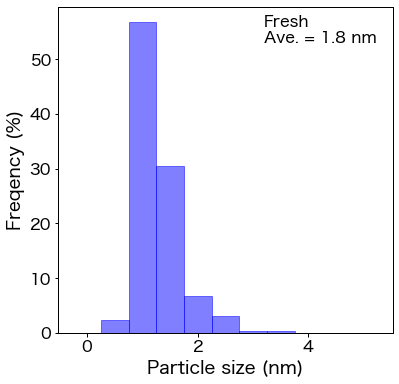

In [88]:
stem_fresh = pd.read_excel('data/20220614_HAADF-STEM_Bar.xlsx', sheet_name='Fresh_fin')
stem_age300 = pd.read_excel('data/20220614_HAADF-STEM_Bar.xlsx', sheet_name='Aged_after_300h')
stem_age1000 = pd.read_excel('data/20220614_HAADF-STEM_Bar.xlsx', sheet_name='Aged_after_1000h')
fig, ax = plt.subplots(facecolor='white', figsize=(6, 6))
plt.xlabel('Particle size (nm)', fontsize=18)
plt.ylabel('Freqency (%)', fontsize=18)
plt.tick_params(labelsize=16)

ax.bar(stem_fresh['Particle size (nm)'], stem_fresh['Freqency (%)'], width=0.5, color='blue', alpha=0.5, edgecolor='blue', align='center')
ax.text(3.2, 56, 'Fresh', ha='left', fontsize=16)
ax.text(3.2, 53, 'Ave. = 1.8 nm', ha='left', fontsize=16)
plt.savefig(f'{PATH}/STEM_particle_size_bar_Fresh.png', dpi=600, bbox_inches='tight')

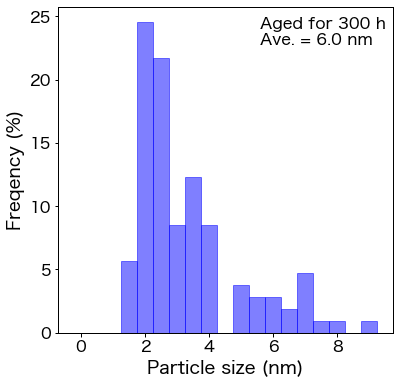

In [91]:
stem_fresh = pd.read_excel('data/20220614_HAADF-STEM_Bar.xlsx', sheet_name='Fresh_fin')
stem_age300 = pd.read_excel('data/20220614_HAADF-STEM_Bar.xlsx', sheet_name='Aged_after_300h')
stem_age1000 = pd.read_excel('data/20220614_HAADF-STEM_Bar.xlsx', sheet_name='Aged_after_1000h')
fig, ax = plt.subplots(facecolor='white', figsize=(6, 6))
plt.xlabel('Particle size (nm)', fontsize=18)
plt.ylabel('Freqency (%)', fontsize=18)
plt.tick_params(labelsize=16)

ax.bar(stem_age300['Particle size (nm)'], stem_age300['Freqency (%)'], width=0.5, color='blue', alpha=0.5, edgecolor='blue', align='center')
ax.text(5.6, 24, 'Aged for 300 h', ha='left', fontsize=16)
ax.text(5.6, 22.8, 'Ave. = 6.0 nm', ha='left', fontsize=16)
plt.savefig(f'{PATH}/STEM_particle_size_bar_Aged_300h.png', dpi=600, bbox_inches='tight')

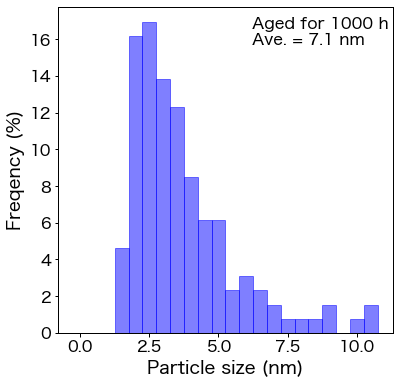

In [94]:
stem_fresh = pd.read_excel('data/20220614_HAADF-STEM_Bar.xlsx', sheet_name='Fresh_fin')
stem_age300 = pd.read_excel('data/20220614_HAADF-STEM_Bar.xlsx', sheet_name='Aged_after_300h')
stem_age1000 = pd.read_excel('data/20220614_HAADF-STEM_Bar.xlsx', sheet_name='Aged_after_1000h')
fig, ax = plt.subplots(facecolor='white', figsize=(6, 6))
plt.xlabel('Particle size (nm)', fontsize=18)
plt.ylabel('Freqency (%)', fontsize=18)
plt.tick_params(labelsize=16)

ax.bar(stem_age1000['Particle size (nm)'], stem_age1000['Freqency (%)'], width=0.5, color='blue', alpha=0.5, edgecolor='blue', align='center')
ax.text(6.2, 16.6, 'Aged for 1000 h', ha='left', fontsize=16)
ax.text(6.2, 15.7, 'Ave. = 7.1 nm', ha='left', fontsize=16)
plt.savefig(f'{PATH}/STEM_particle_size_bar_Aged_1000h.png', dpi=600, bbox_inches='tight')